# EDA, Data wrangling, Scikit-learn ML algorithms & Comparison of Model results



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

from subprocess import check_output

print(check_output(["ls", "/Users/jl/Downloads/input"]).decode("utf8"))


gender_submission.csv
test.csv
train.csv



In [6]:
sns.__version__

'0.12.2'

In [7]:
df_train = pd.read_csv('/Users/jl/Downloads/train.csv')
df_test = pd.read_csv('/Users/jl/Downloads/test.csv')

# Partie 1 : EDA

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.info()

# df_train a 891 entrées, certaines valeurs pour Cabin et Age sont manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
df_test.info()

# Dans df_test, certaines valeurs pour l'âge et de nombreuses valeurs pour la cabine sont également manquantes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
df_train.describe()

# En comparant la distribution des caractéristiques dans df_train et df_test, Pclass et Age semblent très similaires, les distributions pour SibSo, Parch et Fare ne sont que légèrement différentes.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


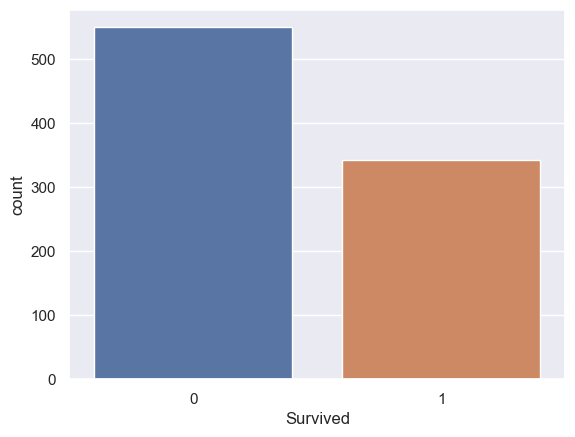

In [14]:
# Parmi tous les passagers du train, combien ont survécu ?

sns.countplot(x='Survived', data=df_train);

In [15]:
print(df_train.Survived.sum()/df_train.Survived.count())

# 38% ont survécu

0.3838383838383838


In [16]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

# Les femmes ont plus de chances de survivre que les hommes

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

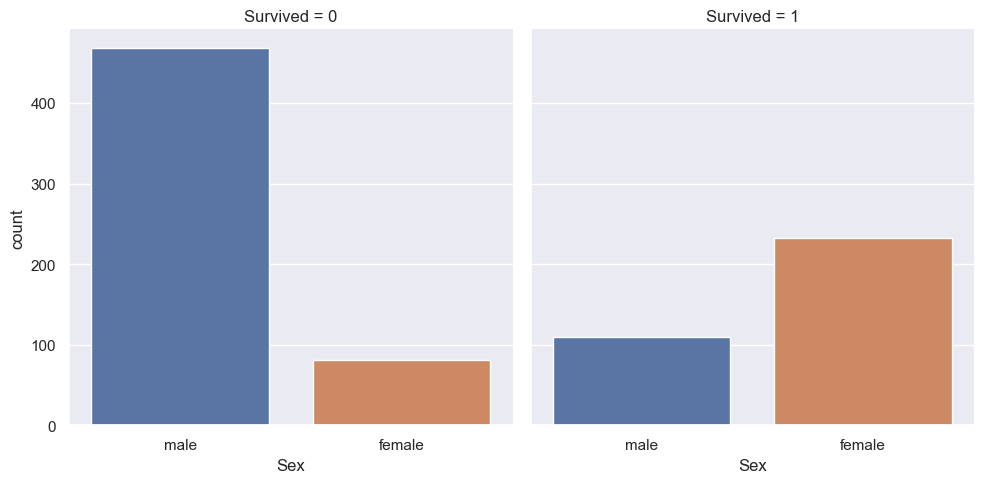

In [17]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df_train);

In [18]:
print("% of women survived: " , df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print("% of men survived:   " , df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


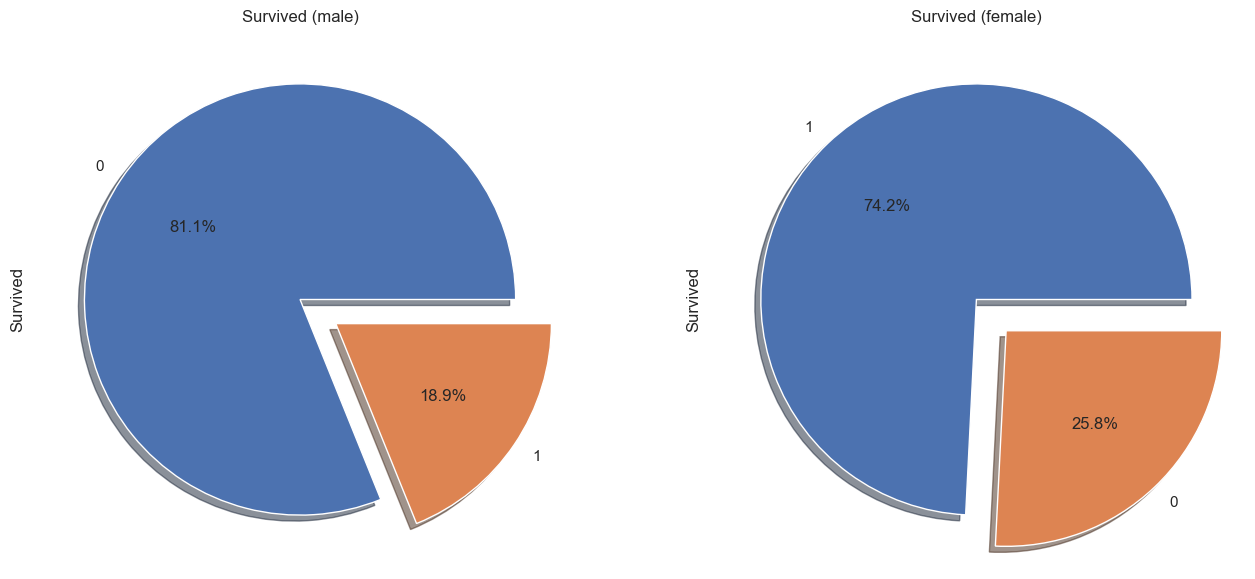

In [19]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [20]:
'''Les femmes ont plus de chances de survivre que les hommes

74 % des femmes ont survécu mais seulement 19 % des hommes (dans l'ensemble d'entraînement)

deuxième modèle : toutes les femmes ont survécu et tous les hommes sont morts'''

"Les femmes ont plus de chances de survivre que les hommes\n\n74 % des femmes ont survécu mais seulement 19 % des hommes (dans l'ensemble d'entraînement)\n\ndeuxième modèle : toutes les femmes ont survécu et tous les hommes sont morts"

Classe passagers : le taux de survie diminue avec la classe P

In [21]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [22]:
print("% of survivals in") 
print("Pclass=1 : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Pclass=2 : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Pclass=3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


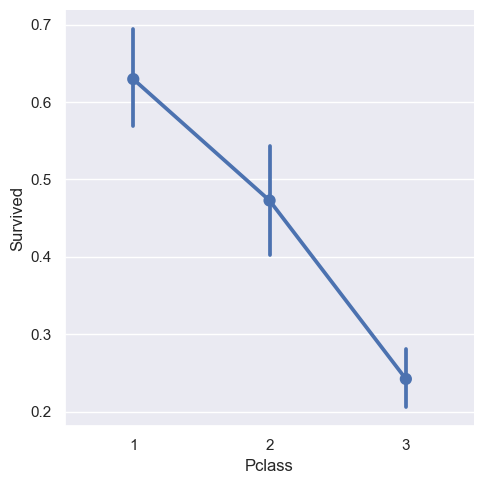

In [23]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=df_train);

Classe de passagers et sexe :

Presque toutes les femmes des classes 1 et 2 ont survécu et presque tous les hommes des classes 2 et 3 sont morts.

In [24]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

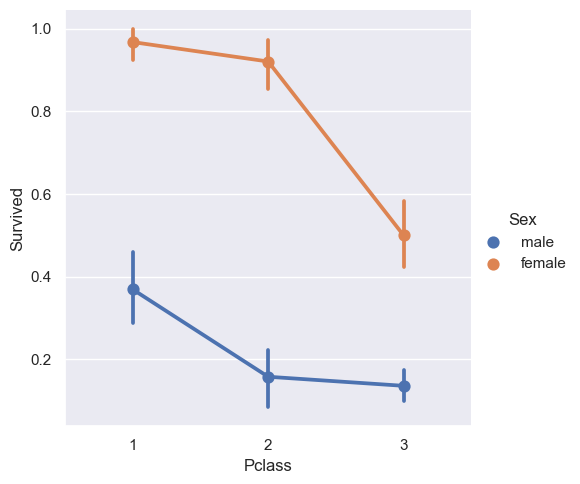

In [25]:
sns.catplot(x='Pclass', y='Survived',hue='Sex', kind='point', data=df_train);


Embarqués : taux de survie le plus faible pour S et le plus élevé pour C

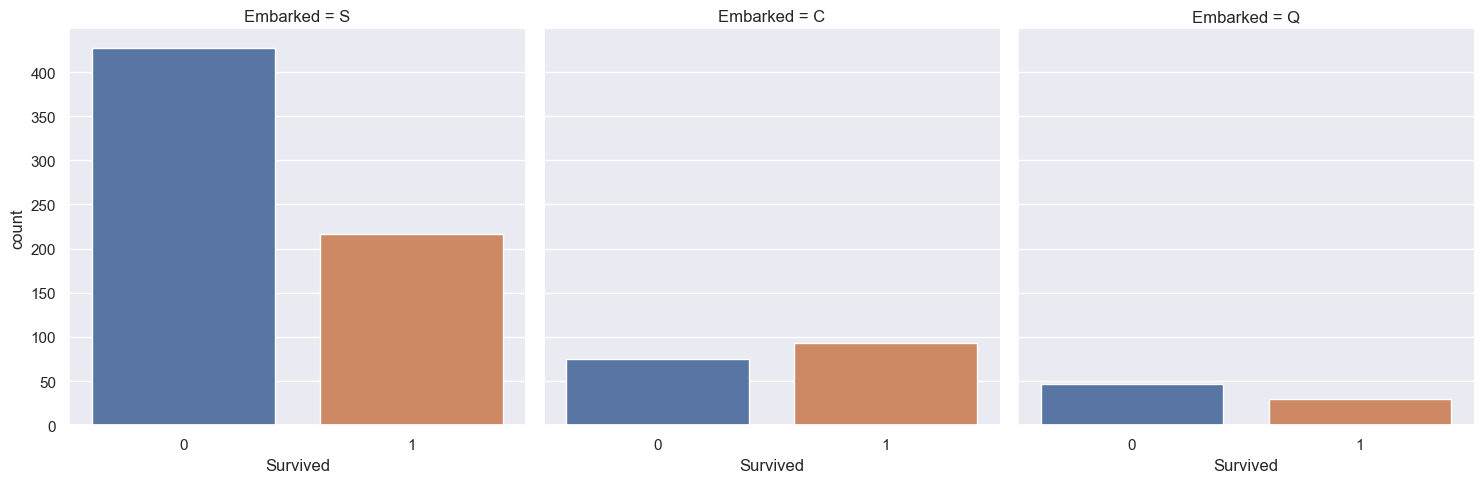

In [26]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train);

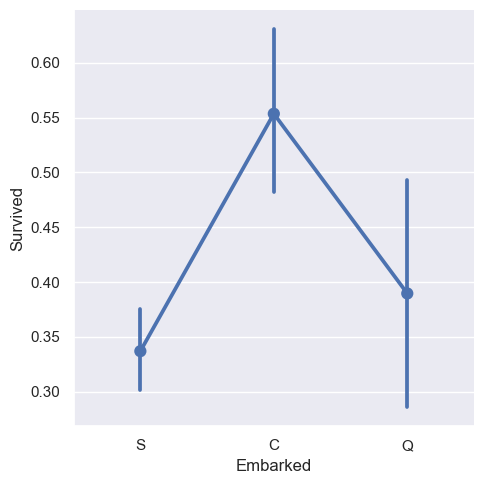

In [27]:
sns.catplot(x='Embarked', y='Survived', kind='point', data=df_train);

Embarquement et sexe

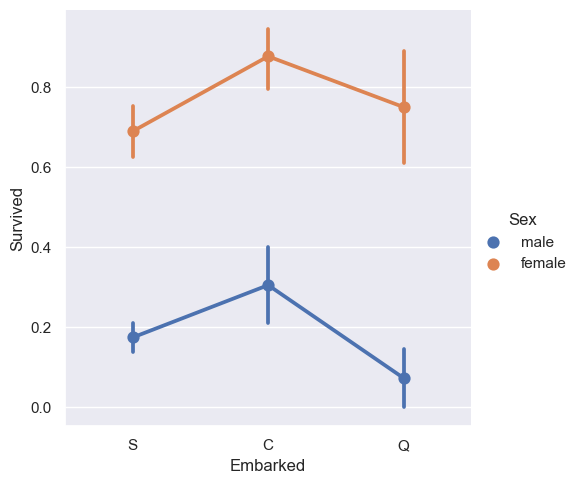

In [28]:
sns.catplot(x='Embarked',y='Survived', hue= 'Sex', kind='point', data=df_train);


Embarqué, classe et sexe :

Pratiquement toutes les femmes de la classe 2 qui ont embarqué dans C et Q ont survécu, de même que presque toutes les femmes de la classe 1.

Tous les hommes des classes 1 et 2 embarqués en Q sont morts, le taux de survie des hommes des classes 2 et 3 est toujours inférieur à 0,2.

Pour les hommes restants de la classe 1 qui ont embarqué dans S et Q, le taux de survie est d'environ 0,4.

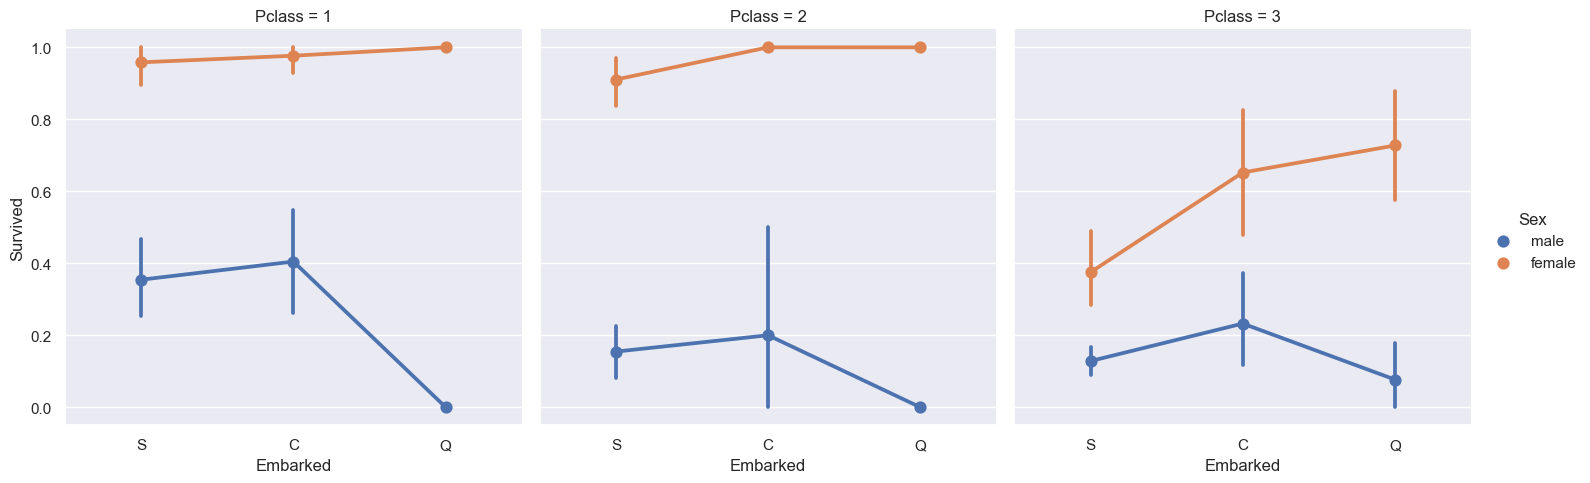

In [29]:
sns.catplot(x='Embarked',y='Survived', col='Pclass', hue= 'Sex', kind='point', data=df_train);

In [30]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

modele 3 basé sur PClass, Sex and Embarked

0.779 accuracy

In [31]:
df_test['Survived'] = 0
# all women survived
df_test.loc[ (df_test.Sex == 'female'), 'Survived'] = 1
# except for those in Pclass 3 and embarked in S
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Embarked == 'S') , 'Survived'] = 0
#df_test[['PassengerId', 'Survived']].to_csv('embarked_pclass_sex.csv', index=False)

Âge : continu numérique à 8 cases

In [32]:
for df in [df_train, df_test]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i

In [33]:
print(df_train[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


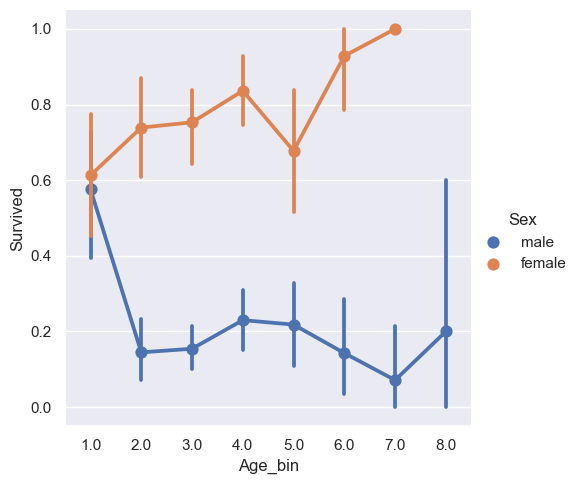

In [34]:
sns.catplot(x='Age_bin',y='Survived',hue='Sex',kind='point',data=df_train);

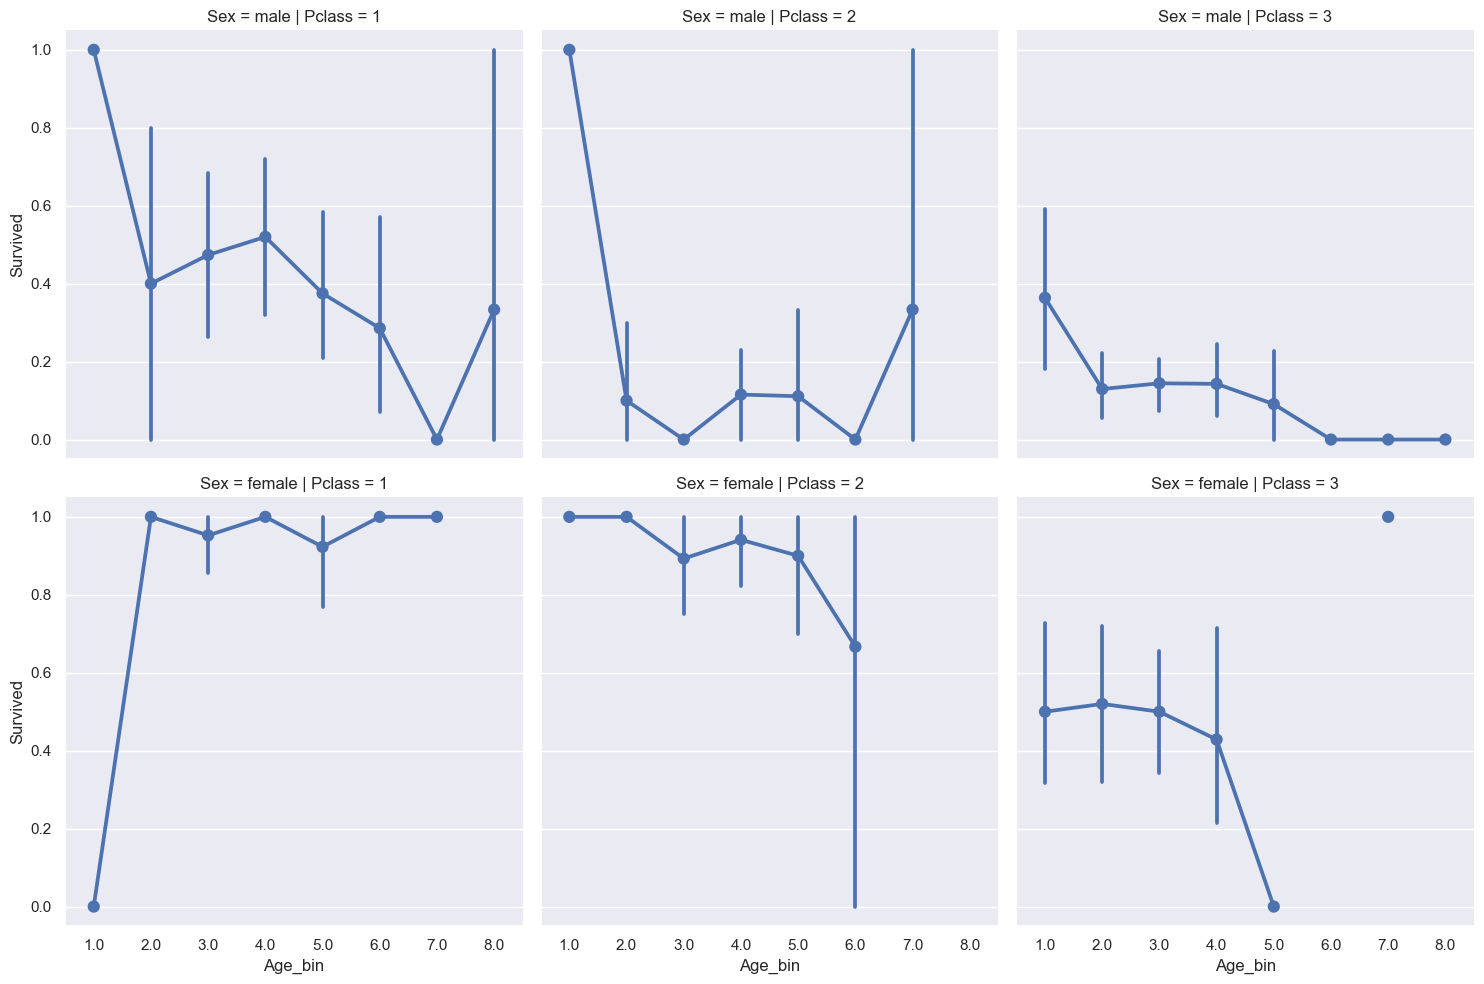

In [35]:
sns.catplot(x='Age_bin',y='Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [36]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

Pour les passagers de Age_bin = 1 (moins de 10 ans) : Tous les hommes des classes 1 et 2 ont survécu.

Toutes les femmes de la classe 3 et de la classe d'âge 5 sont mortes.

(Le taux de survie des femmes de la classe 3 et de la classe d'âge = 4 est inférieur à 50 %).

(Le taux de survie des hommes de la classe 1 et de Age_bin = 4 est supérieur à 50 %)

In [37]:
# dans les classes 1 et 2, tous les hommes de la classe d'âge = 1 ont survécu
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_bin == 1), 'Survived'] = 1
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_bin == 1), 'Survived'] = 1

SibSp and Parch

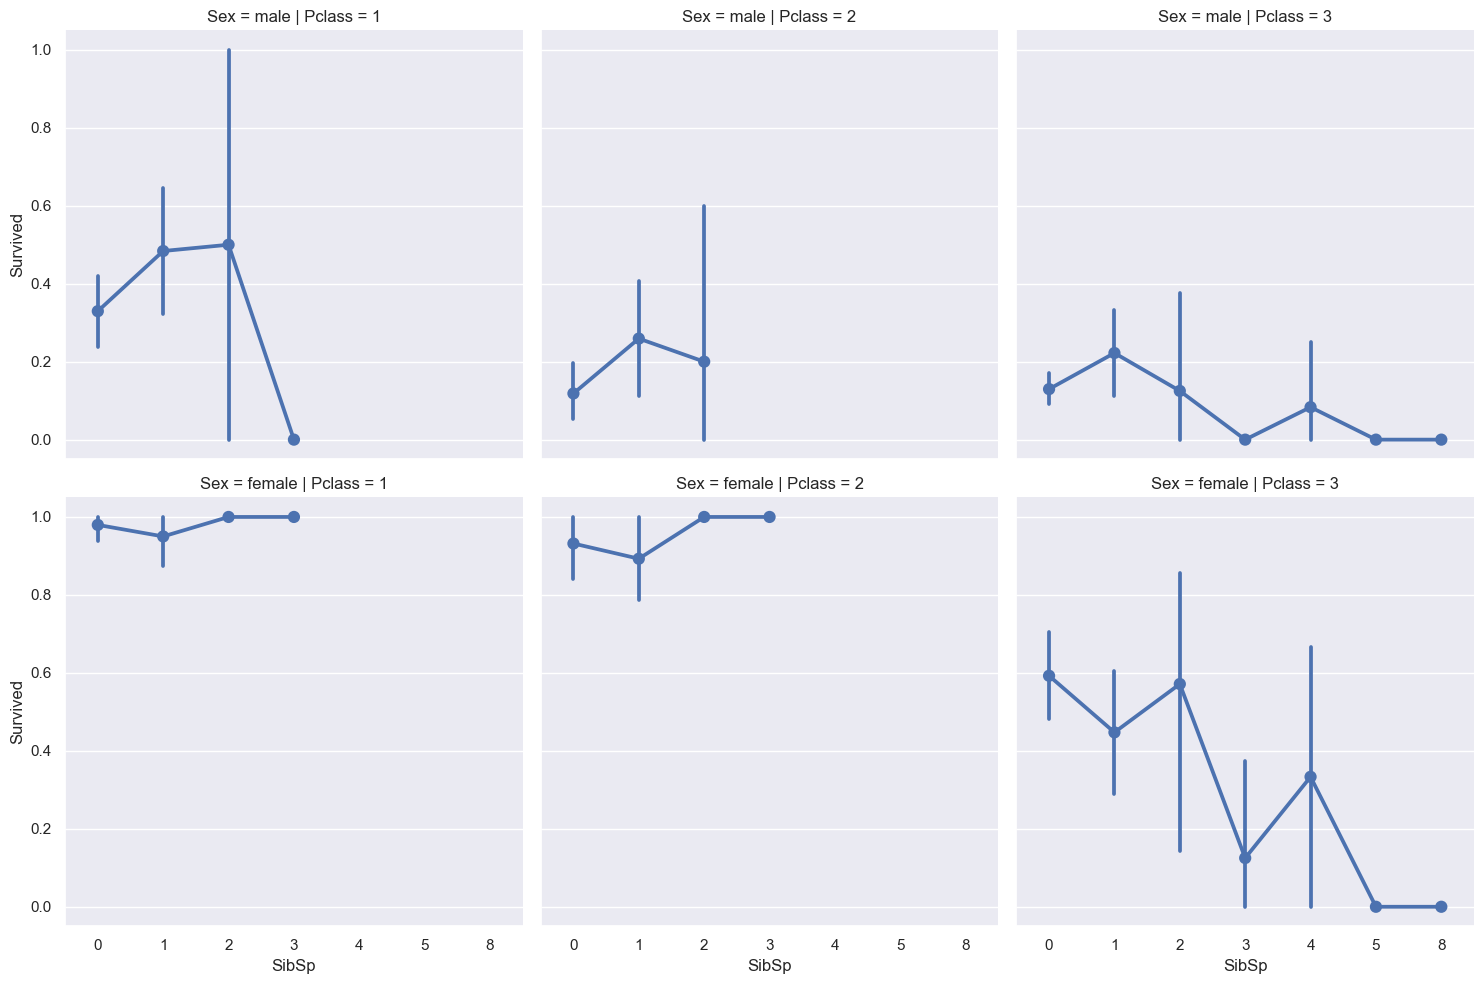

In [38]:
sns.catplot(x='SibSp',y='Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [39]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

Pour les hommes, aucun taux de survie supérieur à 0,5 pour toutes les valeurs de SibSp.

Pour les femmes, les passagers avec SibSp = 3 et Pclass = 3 sont morts, de même que toutes les femmes avec SibSp > 4.

Pour les femmes avec SibSp = 1 et Pclass = 3, le taux de survie est inférieur à 0,5.

In [40]:
# all females with SibSp > 7 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.SibSp > 7) , 'Survived'] = 0

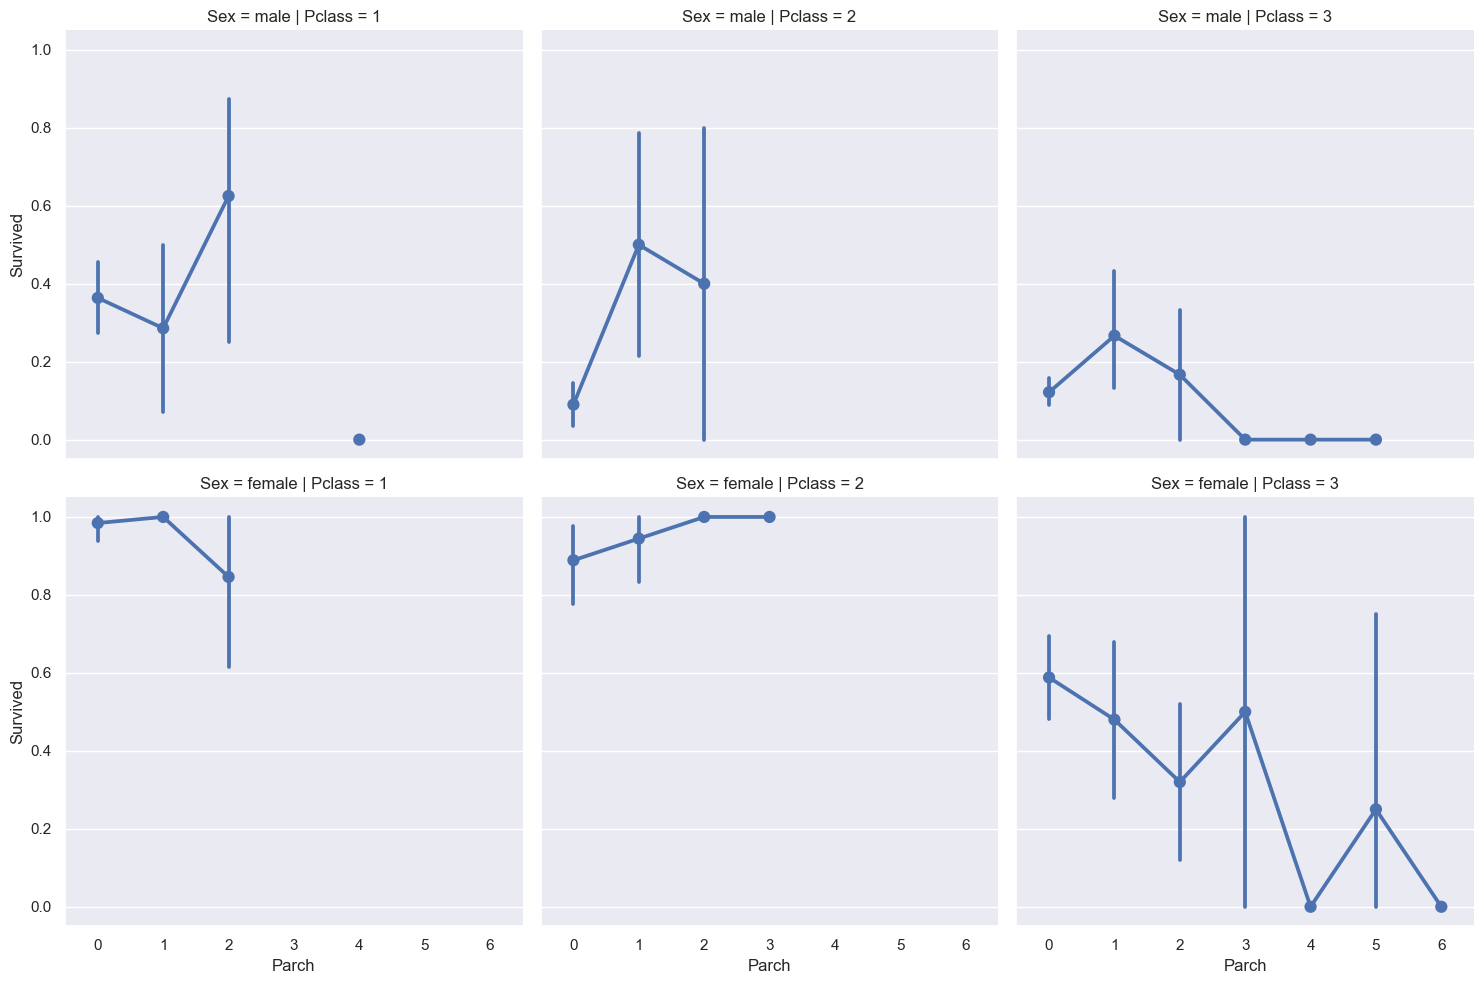

In [41]:
sns.catplot(x='Parch',y='Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [42]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

Très similaire à SibSp - 1, mais avec des valeurs différentes ?

Pour les femmes avec Parch = 2 et Pclass = 3, le taux de survie est inférieur à 0,5.

Toutes les femmes avec Parch = 4 et Pclass = 3 sont mortes.

Toutes les femmes avec Parch > 4 sont mortes.

(Pour les femmes avec Parch = 1 et Pclass = 3, le taux de survie est inférieur à 0,5) Pour les hommes, tous les taux de survie sont inférieurs à 0,5 pour toutes les valeurs de Parch, sauf pour Parch = 2 et Pclass = 1.

In [43]:
# le taux de survie est inférieur à 0,5 pour les femmes avec Parch = 2 et Pclass = 3 
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 2), 'Survived'] = 0

# Toutes les femmes avec Parch = 4 et Pclass = 3 sont mortes
##df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 4), 'Survived'] = 0

# toutes les femmes avec Parch > 4 sont mortes
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Parch > 4) , 'Survived'] = 0

# Pour les hommes avec Parch = 2 et Pclass = 1 le taux de survie est supérieur à 0.5
##df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Parch == 1) , 'Survived'] = 1

#df_test.head(20)

Tarif : numérique continu jusqu'à 12 cases

/var/folders/r5/sycktgpj0ln8vbwphhbh5mb00000gn/T/ipykernel_10991/185973004.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Fare']);


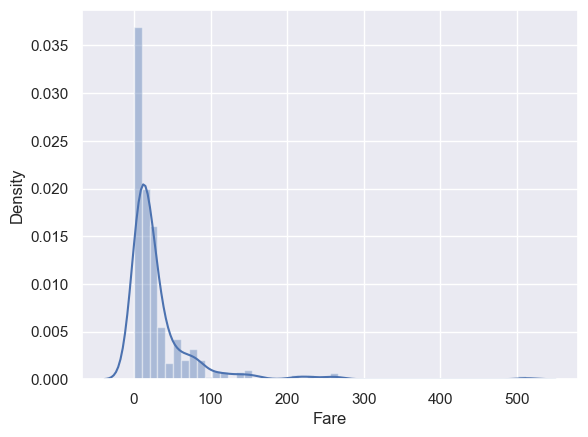

In [44]:
sns.distplot(df_train['Fare']);

In [45]:
for df in [df_train, df_test]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

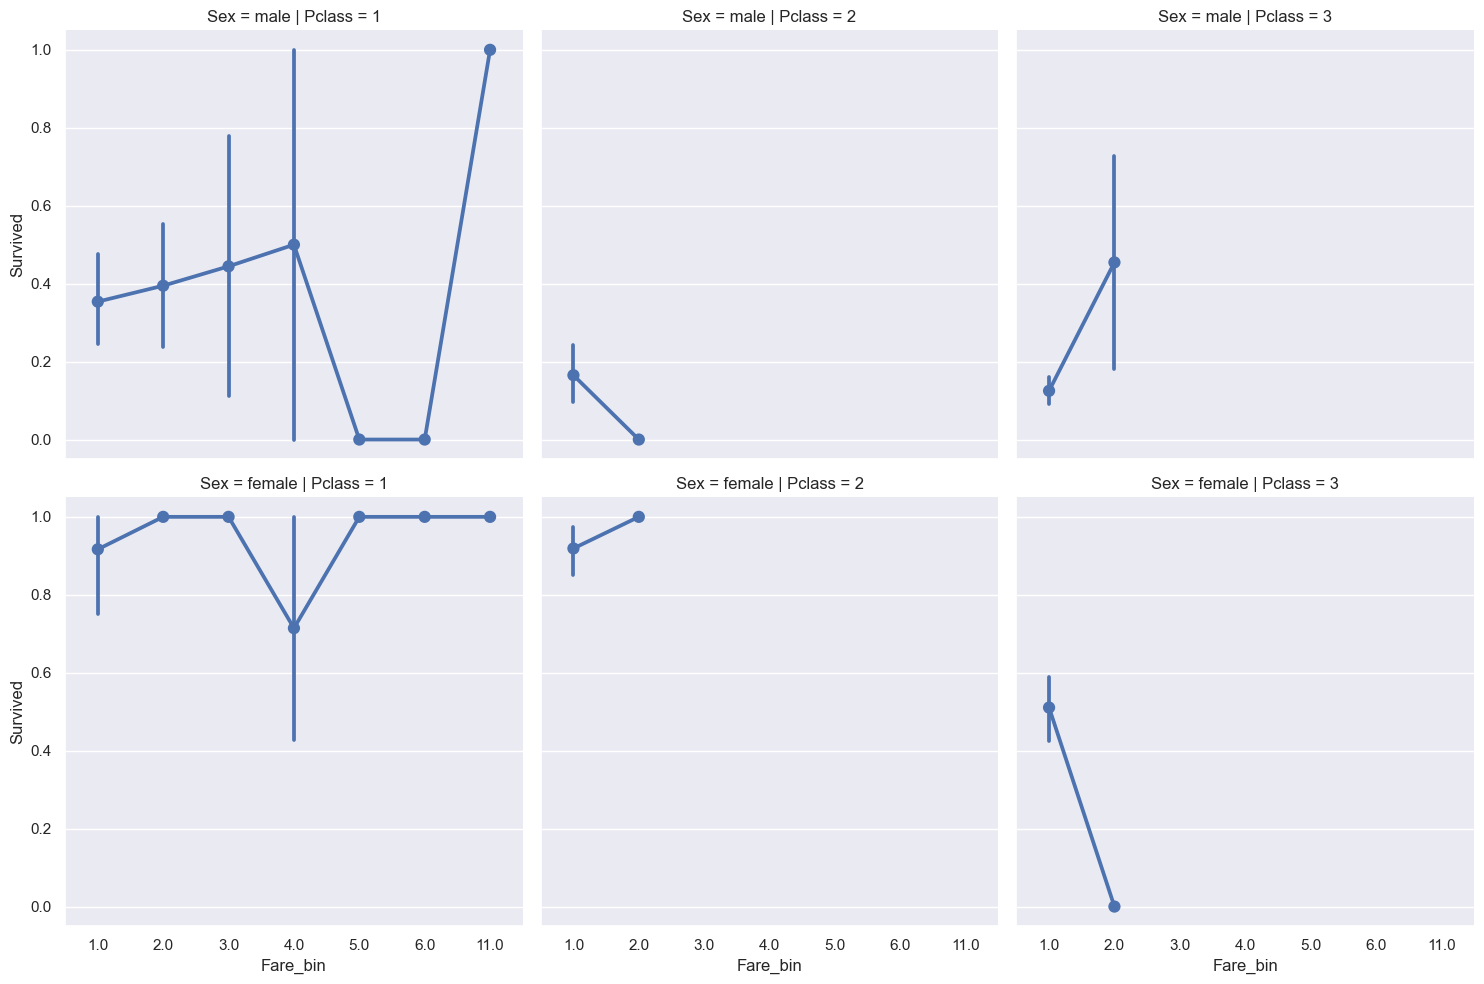

In [46]:
sns.catplot(x='Fare_bin',y='Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [47]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [48]:
# hommes dans Fare_bin = 11 ont survécu
df_test.loc[ (df_test.Sex == 'male') & (df_test.Fare_bin == 11), 'Survived'] = 1

4ème modèle : modèle 3 + Age_bin, SibSp, Parch et Fare_bin

0.789 précision

In [49]:
# model 4
# df_test[['PassengerId', 'Survived']].to_csv('model_4.csv', index=False)

In [50]:
df_test.drop(['Survived'],axis=1,inplace=True)

# Partie 2 : Data wrangling (Traitement des données)

construire deux nouveaux dataset = df_train_ml et df_test_ml

ils n'auront que des caractéristiques ordinales et pas de valeurs manquantes afin qu'ils puissent être utilisés pour les algorithmes de ML

conversion des données catégorielles en données numériques par pd.get_dummies

en supprimant toutes les caractéristiques qui ne semblent pas utiles pour la prédiction.

Puis utilisation de l'échelle standard (Standard scaler) et application de train/test split

In [51]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

pandas get_dummies pour les caractéristiques catégorielles

In [52]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)

In [53]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)

In [54]:
df_train_ml.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1


In [55]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       714 non-null    int64  
 3   Parch       714 non-null    int64  
 4   Fare        714 non-null    float64
 5   Sex_male    714 non-null    uint8  
 6   Embarked_Q  714 non-null    uint8  
 7   Embarked_S  714 non-null    uint8  
 8   Pclass_2    714 non-null    uint8  
 9   Pclass_3    714 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


In [56]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         332 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Sex_male    418 non-null    uint8  
 5   Embarked_Q  418 non-null    uint8  
 6   Embarked_S  418 non-null    uint8  
 7   Pclass_2    418 non-null    uint8  
 8   Pclass_3    418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


In [57]:
df_test_ml.head(10)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
5,14.0,0,0,9.2250,1,0,1,0,1
6,30.0,0,0,7.6292,0,1,0,0,1
7,26.0,1,1,29.0000,1,0,1,1,0
8,18.0,0,0,7.2292,0,0,0,0,1
9,21.0,2,0,24.1500,1,0,1,0,1


# Matrice de corrélation

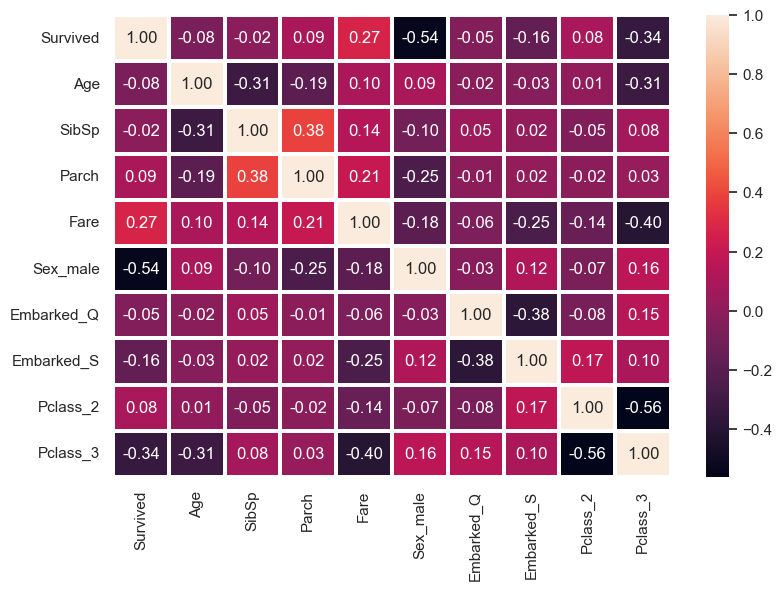

In [58]:
corr = df_train_ml.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

Il existe une corrélation positive entre Survivant et Fare, et une corrélation négative entre Survivant et Sex_male.

Il existe également une corrélation négative entre Survivant et Pclass_3. SibSp et Parch sont corrélés

sklearn StandardScaler

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# df_train_ml
scaler.fit(df_train_ml.drop('Survived',axis=1))
scaled_features = scaler.transform(df_train_ml.drop('Survived',axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features, columns=df_train_ml.columns[:-1])

# df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
# scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features, columns=df_test_ml.columns)

train_test_split

j'utilise 70% des données pour l'entraînement et 30% pour le test

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_ml.drop('Survived',axis=1), df_train_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_train_ml_sc, df_train_ml['Survived'], test_size=0.30, random_state=101)

all data for submission

In [61]:
# unscaled
X_train_all = df_train_ml.drop('Survived',axis=1)
y_train_all = df_train_ml['Survived']
X_test_all = df_test_ml

# scaled
X_train_all_sc = df_train_ml_sc
y_train_all_sc = df_train_ml['Survived']
X_test_all_sc = df_test_ml_sc

fillna : remplir nan avec les valeurs moyennes de cette colonne

In [62]:
X_test_all.fillna(X_test_all.mean(), inplace=True)
print("*")

*


# Partie 3 : Algorithmes ML de base de Scikit-learn et comparaison des résultats des modèles


Test de modèles simples de scikit-learn et comparaison par métriques :

Je teste les classificateurs suivants de scikit-learn :

- Régression logistique

- Naive Bayes gaussien

- K plus proches voisins KNN

- Arbre de décision

- Classificateur de forêt aléatoire


Je vais appliquer d'abord les données test/train split pour obtenir un premier aperçu des performances du modèle.

Ensuite, nous utilisons la k fold cross validation (validation croisée) qui donne une meilleure estimation pour les données hors échantillon.

Pour comparer les résultats, j'utilise les métriques suivantes :
score_de_précision, rapport_de_classification, matrice_de_confusion

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rappel :


matrice de confusion :

utilisée pour évaluer la qualité des résultats d'un classificateur.
Les éléments diagonaux représentent le nombre de points pour lesquels l'étiquette prédite est égale à l'étiquette réelle, tandis que les éléments hors diagonale sont ceux qui sont mal étiquetés par le classificateur. 
Plus les valeurs diagonales de la matrice de confusion sont élevées, mieux c'est, indiquant de nombreuses prédictions correctes.
(extrait de la documentation de sklearn, légèrement modifié)

Les lignes d'une matrice de confusion correspondent aux classes réelles et les colonnes aux classes prédites.

Ainsi, la matrice de confusion d'un classificateur binaire est composée de 4 valeurs :

TN FP
FN TP

TN : Vrais négatifs (prédiction : n'a pas survécu, vrai : n'a pas survécu)
FP : Faux positifs (prédiction : survécu, vrai : non survécu)
FN : Faux négatifs (prédiction : pas survécu, vrai : survécu)
TP : Vrais positifs (prédiction : survécu, vrai : survécu)

accuracy score (score de précision) :

accuracy de la classification = prédictions correctes / prédictions totales = (TP + TN) / (TP + TN + FP + FN)




rapport_de_classification :

à partir de https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html :

La précision est le ratio tp / (tp + fp) où tp est le nombre de vrais positifs et fp le nombre de faux positifs. La précision est intuitivement la capacité du classificateur à ne pas étiqueter comme positif un échantillon qui est négatif.

Le rappel (recall) est le ratio tp / (tp + fn) où tp est le nombre de vrais positifs et fn le nombre de faux négatifs. Le rappel est intuitivement la capacité du classificateur à trouver tous les échantillons positifs.

Le score F-beta (F-beta score) peut être interprété comme une moyenne harmonique pondérée de la précision et du rappel, où un score F-beta atteint sa meilleure valeur à 1 et sa pire valeur à 0.

Le score F-beta pondère le rappel plus que la précision par un facteur bêta. bêta == 1,0 signifie que le rappel et la précision sont d'égale importance.

Le support est le nombre d'occurrences de chaque classe dans y_true.

précision recall f1-score support

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

[[105  18]
 [ 29  63]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       123
           1       0.78      0.68      0.73        92

    accuracy                           0.78       215
   macro avg       0.78      0.77      0.77       215
weighted avg       0.78      0.78      0.78       215

0.7813953488372093


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train again for all data and submit

In [65]:
logreg.fit(X_train_all, y_train_all)
pred_all_logreg = logreg.predict(X_test_all)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
sub_logreg = pd.DataFrame()
sub_logreg['PassengerId'] = df_test['PassengerId']
sub_logreg['Survived'] = pred_all_logreg
#sub_logmodel.to_csv('logmodel.csv',index=False)

# Gaussian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))

[[107  16]
 [ 36  56]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       123
           1       0.78      0.61      0.68        92

    accuracy                           0.76       215
   macro avg       0.76      0.74      0.74       215
weighted avg       0.76      0.76      0.75       215

0.7581395348837209


# KNN - KNeighborsClassifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_sc,y_train_sc)

KNeighborsClassifier(n_neighbors=20)

In [80]:
pred_knn = knn.predict(X_test)

print(confusion_matrix(y_test, pred_knn))

print(classification_report(y_test, pred_knn))

print(accuracy_score(y_test, pred_knn))


[[102  21]
 [ 50  42]]
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       123
           1       0.67      0.46      0.54        92

    accuracy                           0.67       215
   macro avg       0.67      0.64      0.64       215
weighted avg       0.67      0.67      0.66       215

0.6697674418604651


In [79]:
knn.fit(X_train_all, y_train_all)
pred_all_knn = knn.predict(X_test_all)

In [72]:
sub_knn = pd.DataFrame()
sub_knn['PassengerId'] = df_test['PassengerId']
sub_knn['Survived'] = pred_all_knn
#sub_knn.to_csv('knn.csv',index=False)

# Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       123
           1       0.73      0.64      0.68        92

    accuracy                           0.74       215
   macro avg       0.74      0.73      0.73       215
weighted avg       0.74      0.74      0.74       215

0.7441860465116279


un autre arbre de décision avec des paramètres différents pour max_features, max_depth et min_sample_split

In [75]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(X_train,y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(classification_report(y_test, pred_dtree_2))
print(accuracy_score(y_test, pred_dtree_2))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       123
           1       0.79      0.72      0.75        92

    accuracy                           0.80       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.79      0.80      0.79       215

0.7953488372093023


all data

In [81]:
dtree_2.fit(X_train_all, y_train_all)
pred_all_dtree2 = dtree_2.predict(X_test_all)

# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=7)

In [83]:
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[116   7]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       123
           1       0.89      0.62      0.73        92

    accuracy                           0.80       215
   macro avg       0.83      0.78      0.79       215
weighted avg       0.82      0.80      0.80       215

0.8046511627906977


Train again for all data and submit

In [84]:
rfc.fit(X_train_all, y_train_all)
pred_all_rfc = rfc.predict(X_test_all)

In [85]:
sub_rfc = pd.DataFrame()
sub_rfc['PassengerId'] = df_test['PassengerId']
sub_rfc['Survived'] = pred_all_rfc
#sub_rfc.to_csv('randforest.csv',index=False)

# k fold cross_validation

rappel : Cet algorithme divise les données en k ensembles et effectue ensuite k ajustements en utilisant chaque ensemble k-1 fois comme données d'entraînement et une fois comme données de test

Il permet d'obtenir une meilleure estimation que le train test split, pour les données hors échantillon

In [94]:
from sklearn.model_selection import cross_val_score

# for Random Forest classifier

In [95]:
scores_rfc = cross_val_score(rfc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.76388889 0.75       0.73611111 0.88888889 0.83098592 0.84507042
 0.83098592 0.73239437 0.87323944 0.88732394]
0.8138888888888889


# for DecisionTreeClassifier

In [96]:
scores_dtree_2 = cross_val_score(dtree_2, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

[0.66666667 0.79166667 0.76388889 0.79166667 0.84507042 0.81690141
 0.83098592 0.77464789 0.85915493 0.81690141]
0.7957550860719874


# Les classificateurs les plus performants sont Decision Tree et Random Forest.

In [97]:
print("dtree_2 : " , scores_dtree_2.mean())
print("rfc     : " , scores_rfc.mean())

dtree_2 :  0.7957550860719874
rfc     :  0.8138888888888889


# Note sur les scores :

Certains data scientist calculent des scores basés sur l'ensemble d'apprentissage.

Ce n'est pas un bon indicateur de la performance du modèle, car nous voulons savoir si le modèle se généralise pour des données qui n'ont pas été utilisées pour l'ajustement du modèle.

C'est pourquoi les scores dans ces 2 notebooks sont toujours basés sur des données de test ou de validation hors échantillon.

# Conclusion du 1er notebook

J'ai pu exploiter les bases de l'EDA avec Pandas et Matplotlib, ainsi que les principes pour appliquer les modèles de classification de la bibliothèque scikit learn.

Suite à l'EDA réalisée, j'ai constaté un fort impact des features comme le Sex, Age, Embarked sur la cible.

Par la suite, j'ai construit un modèle avec Pandas, en utilisant uniquement ces features

Toujours avec Pandas, j'ai également créé un dataset qui peut être utilisé par les classificateurs sklearn pour la prédiction.

Les 2 meilleurs modèles de ML pour cette tâche et l'ensemble des features, ont été déterminés par un score de "k fold cross validation" et sont :
- l'Arbre de décision et le Random Forest
- En soumettant leurs prédictions, ils obtiennent un score de 0,80 pour l'un et 0,81 pour l'autre



Dans le 2ème notebook, j'étudie comment améliorer ces scores en :

- utilisant des features construites à partir des features existantes (Feature Engineering)

- optimisant les hyperparamètres du modèle avec GridSearchCV

- appliquant des techniques telles que le boosting, l'empilage et le vote